# Principal Component Analysis

## PCA: 2-dimensional Toy Data

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import os
from sklearn.feature_extraction.image import extract_patches_2d

### Load the dataset pca-data-2d.dat and make a scatter plot of the centered data

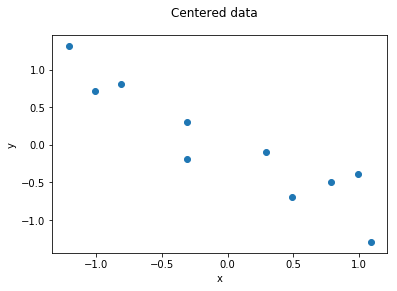

In [2]:
data= np.loadtxt('pca-data-2d.dat')
centered_data = data - np.mean(data, axis = 0)
fig= plt.scatter(centered_data[:, 0], centered_data[:, 1])
plt.xlabel('x'); plt.ylabel('y'); plt.suptitle('Centered data')
plt.show()

### Determine the Principal Component Directions (PCs) and make another scatter plot of the same data points in the coordinate system spanned by the 2 PCs.

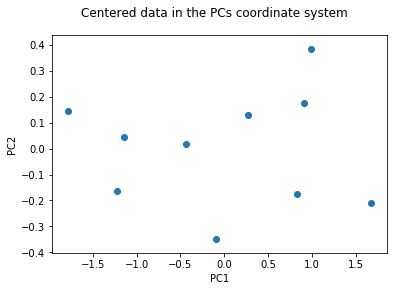

In [3]:
cov = np.cov(centered_data.T)                     # compute the covariance matrix
eigval, eigvec = np.linalg.eig(cov)               # eigenvalue eigenvector decomposition
data_PCs= np.dot(eigvec.T, centered_data.T).T     # project data onto PC's
fig= plt.scatter(data_PCs[:, 0], data_PCs[:, 1])
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.suptitle('Centered data in the PCs coordinate system')
plt.show()

### PCA can be used to compress data e.g. using only information contained in the first n out of N PCs. Plot the reconstruction of the data in the original coordinate system when using (i) only the first or (ii) only the second PC for reconstruction.

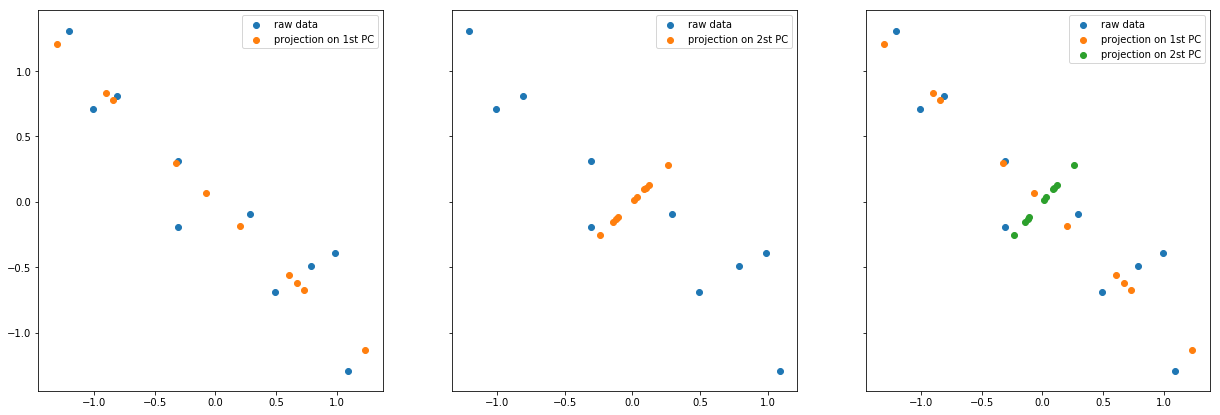

In [4]:
eigvec1 = eigvec[:, 0].reshape(1,2)
rec_data1 = np.dot(np.dot(eigvec1, centered_data.T).T, eigvec1)

eigvec2 = eigvec[:, 1].reshape(1,2)
rec_data2 = np.dot(np.dot(eigvec2, centered_data.T).T, eigvec2)

fig, ax = plt.subplots(1, 3, sharey = True, figsize = (21, 7))
ax[0].scatter(centered_data[:, 0], centered_data[:, 1], label = 'raw data')
ax[0].scatter(rec_data1[:, 0], rec_data1[:, 1], label = 'projection on 1st PC')
ax[0].legend()
ax[1].scatter(centered_data[:, 0], centered_data[:, 1], label = 'raw data')
ax[1].scatter(rec_data2[:, 0], rec_data2[:, 1], label = 'projection on 2st PC')
ax[1].legend()
ax[2].scatter(centered_data[:, 0], centered_data[:, 1], label = 'raw data')
ax[2].scatter(rec_data1[:, 0], rec_data1[:, 1], label = 'projection on 1st PC')
ax[2].scatter(rec_data2[:, 0], rec_data2[:, 1], label = 'projection on 2st PC')
ax[2].legend()
plt.show()

## PCA: 3-dimensional Toy Data

### Load the dataset pca-data-3d.txt and center it

          x         y         z
0 -0.237818  0.131616 -0.151669
1 -0.023209 -0.472057 -0.931011
2  0.788705  2.962993 -2.666321
3  0.733318  1.448557  1.329181
4 -0.069082 -0.027212  0.148085


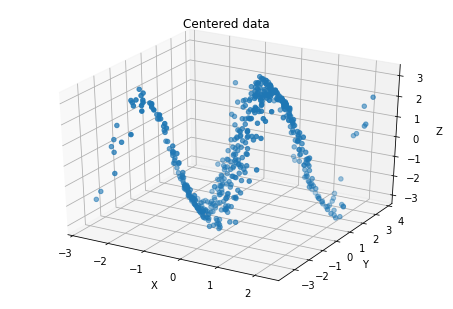

In [5]:
pca_data_3d=pd.read_csv('pca-data-3d.txt')
centered_pca_3d= pca_data_3d-pca_data_3d.mean()
print (centered_pca_3d.head())

data3d= np.array(centered_pca_3d.T)
fig, ax = plt.subplots()
ax = Axes3D(fig);
ax.scatter(data3d[0, :], data3d[1, :], data3d[2, :])
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.set_title('Centered data')
plt.show()

### Examine the 3d-reconstruction of the data in the original coordinate systems when using only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful these directions (i.e., the PCs) are.

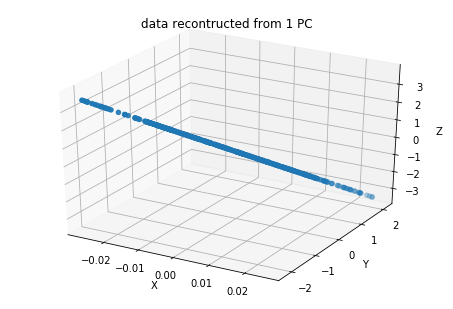

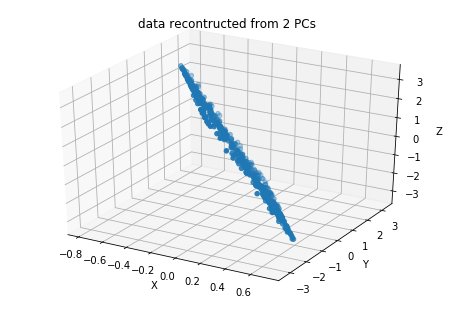

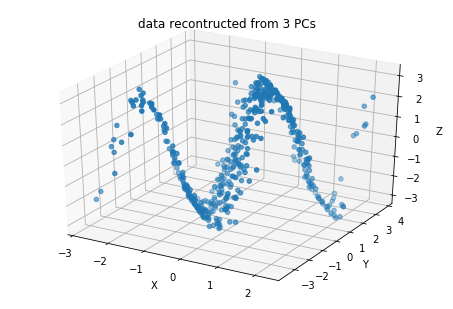

In [6]:
cov3d= np.cov(data3d)                              # compute covariance matrix
eigvals3d, eigvecs3d= np.linalg.eigh(cov3d)        # eigenvalue eigenvector decomposition

#sort the eigenvectors and eigenvalues in decreasing order
idx = eigvals3d.argsort()[::-1]
eigvals3d = eigvals3d[idx]
eigvecs3d = eigvecs3d[idx,:]

# reconstruction
for i in range(1,4):
    vec= np.reshape(eigvecs3d[:, 0:i], (data3d.shape[0], i))
    data_rec= np.dot(np.dot(vec.T, data3d).T, vec.T)
    fig, ax = plt.subplots()
    ax = Axes3D(fig);
    ax.scatter(data_rec[:, 0], data_rec[:, 1], data_rec[:, 2])
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    if i == 1:
        ax.set_title('data recontructed from {} PC'.format(i))
    else:
        ax.set_title('data recontructed from {} PCs'.format(i))

By using just one or two principal components it is not possible to reconstruct original data - the information is lost. Only with all three principal components it was possible to achieve a reconstruction that matches original data.

## Image data compression and reconstruction. The file imgpca.zip contains different categories of training images. For pictures from each of the categories nature (prefix n) and buildings (prefix b) do the following:

### Sample (randomly) a total of at least N=5000 patches (e.g. 500 per image) of 16x16 pixels from this set of images and assemble them in a big Nx256 matrix.

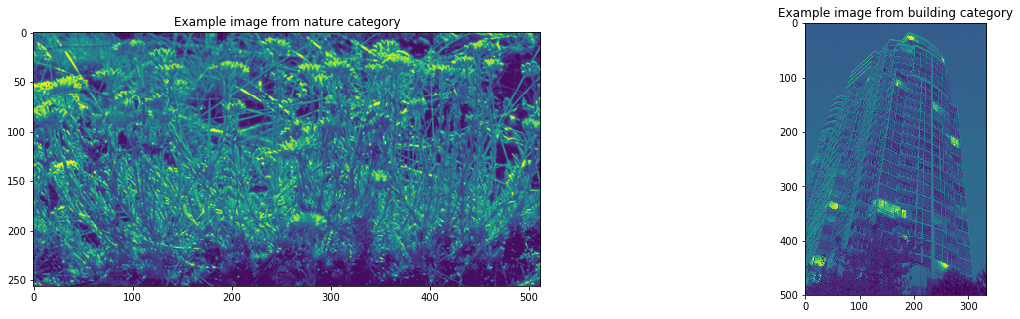

In [7]:
nature = []
building = []
path = "imgpca"
for file in os.listdir(path):
    if file.startswith('n'):
        nature.append(file)
    if file.startswith('b'):
        building.append(file)
        
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].imshow(plt.imread(os.path.join(path, nature[6])))
ax[0].set_title('Example image from nature category')
ax[1].imshow(plt.imread(os.path.join(path, building[3])))
ax[1].set_title('Example image from building category')
plt.show()

In [8]:
rng = np.random.RandomState(0)

def get_patches(list_images, size):
    patches = np.empty((500*len(list_images), size*size))
    for i in range(len(list_images)):
        p = extract_patches_2d(plt.imread(os.path.join(path, list_images[i])), 
                                          (size, size), 
                                          max_patches=500, 
                                          random_state=rng)
        p = np.reshape(p, (500, size*size))
        patches[i*500:(i+1)*500] = p
        return patches

nature_patches = get_patches(nature, 16)
building_patches = get_patches(building, 16)

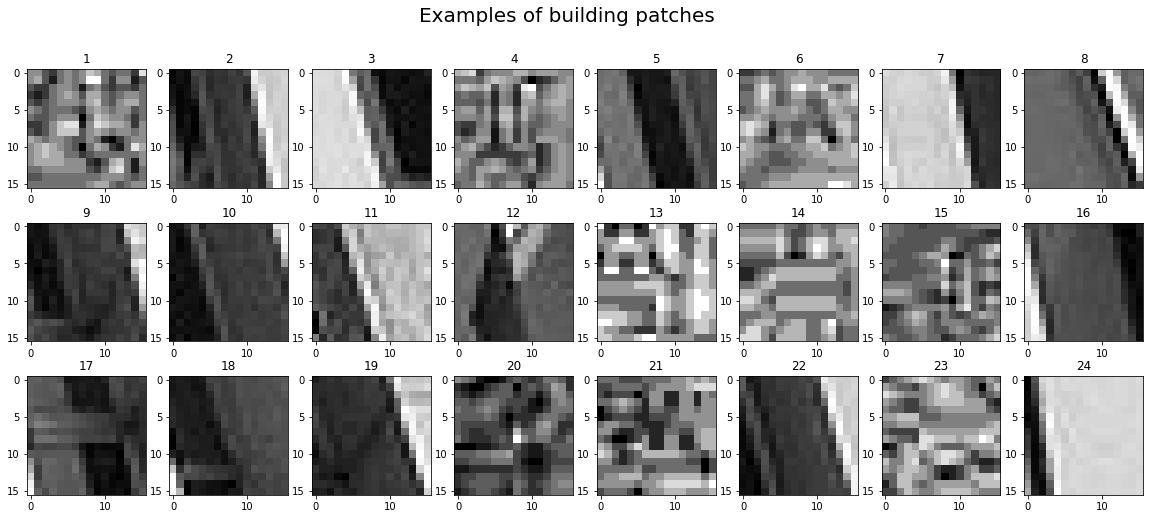

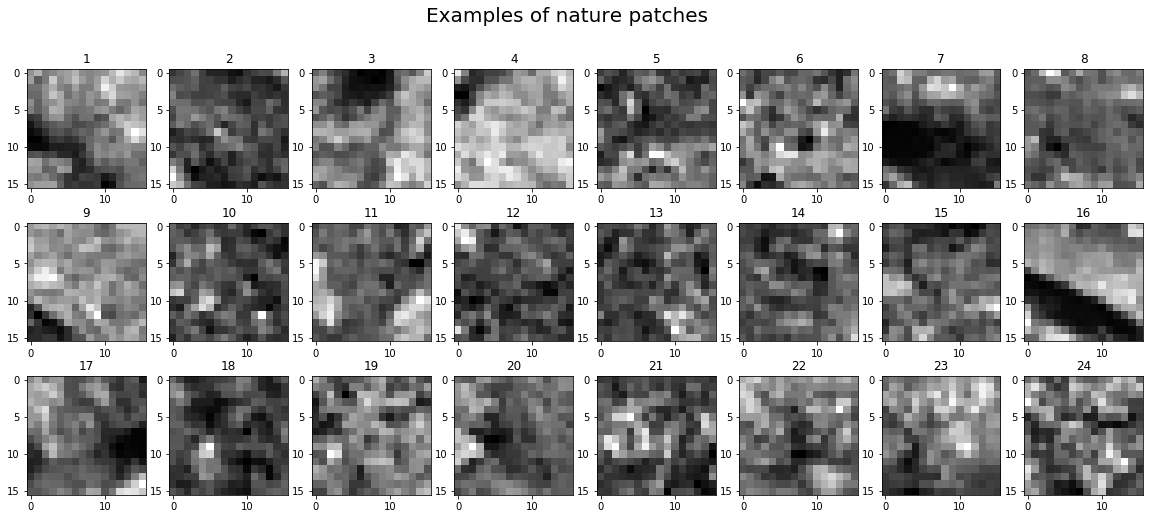

In [9]:
def draw_patches(patches, title):
    fig = plt.figure(figsize=(20, 8))
    plt.suptitle(title, fontsize = '20')
    for i in range(24):
        plt.subplot(3, 8, i + 1)
        plt.imshow(np.reshape(patches[i], (16, 16)), cmap = 'gray')
        plt.title(i+1)
    plt.show()
    
draw_patches(building_patches, 'Examples of building patches')
draw_patches(nature_patches, 'Examples of nature patches')

There are differences between building and nature PCs. The PCs for buildings are more "regular" than the PCs for nature and there are straight lines. In the nature PCs one can see circular structeres.

### Calculate the PCs of these image patches and show the first 24 as 16x16 image patches. Are there differences between the PCs for buildings vs. nature?

In [10]:
from sklearn.decomposition import PCA
pca_b = PCA(n_components=256)
pca_b.fit(building_patches)
pca_n = PCA(n_components=256)
pca_n.fit(nature_patches)

PCA(copy=True, iterated_power='auto', n_components=256, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

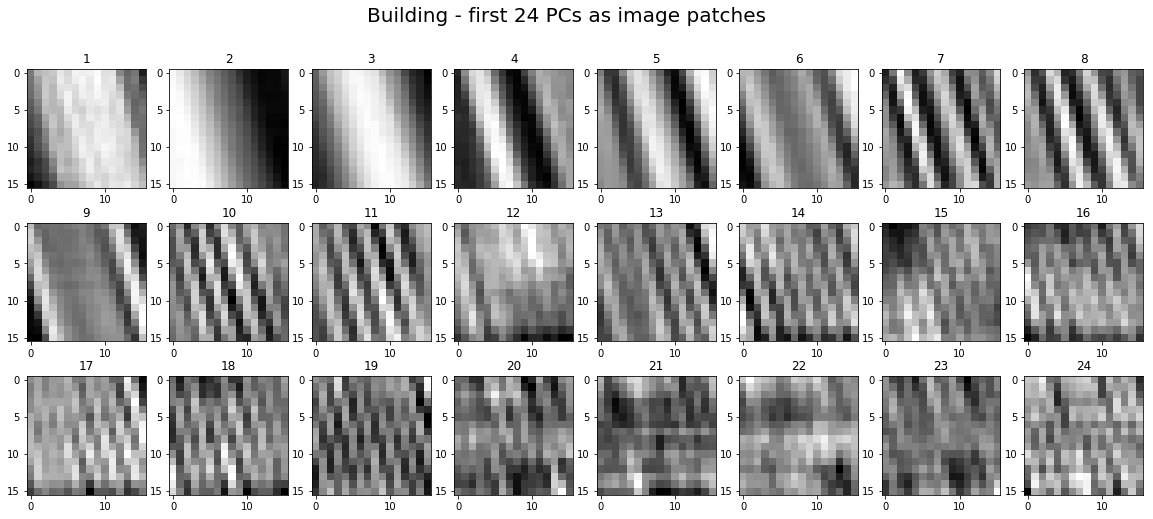

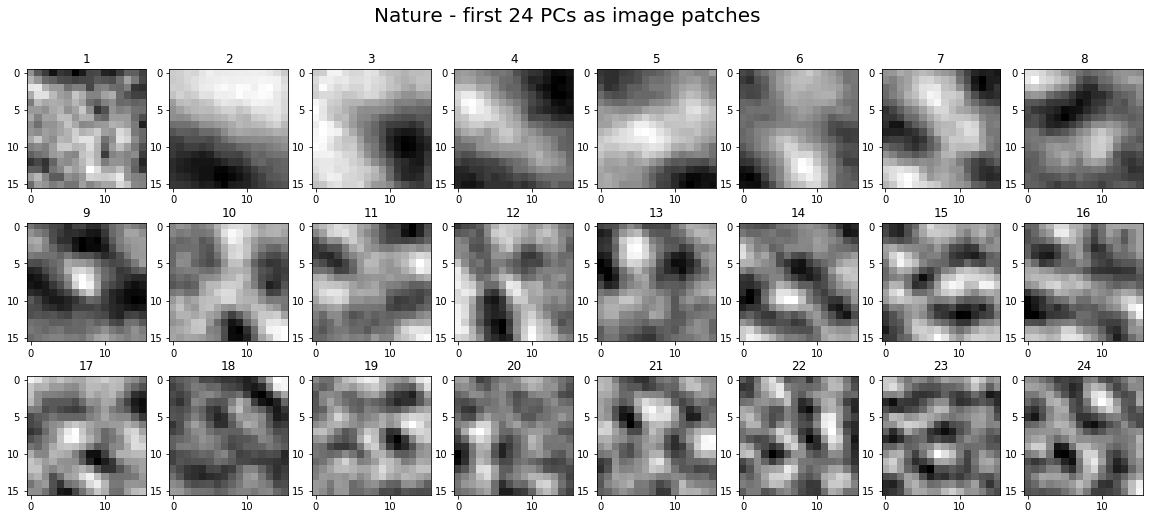

In [11]:
draw_patches(pca_b.components_, 'Building - first 24 PCs as image patches')
draw_patches(pca_n.components_, 'Nature - first 24 PCs as image patches')

### Answer using a scree plot: how many PCs should you keep for each of the two image groups?

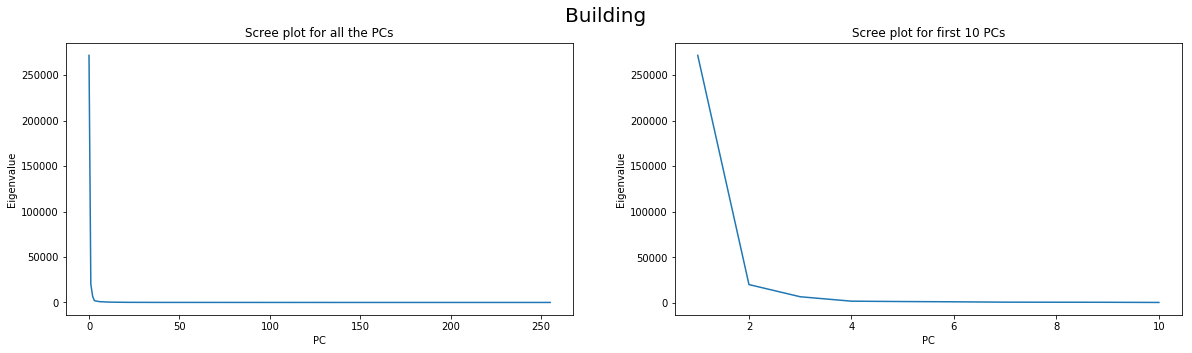

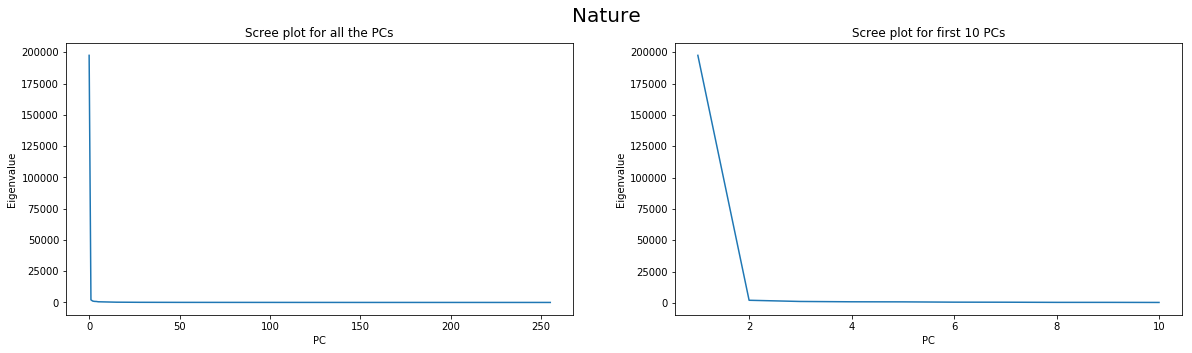

In [12]:
def scree_plot(data, title):
    fig, ax = plt.subplots(1, 2, figsize = (20, 5))
    fig.suptitle(title, fontsize = '20')
    ax[0].plot(data)
    ax[0].set_xlabel("PC"); ax[0].set_ylabel("Eigenvalue"); ax[0].set_title('Scree plot for all the PCs')
    ax[1].plot(np.arange(1,11), data[0:10])
    ax[1].set_xlabel("PC"); ax[1].set_ylabel("Eigenvalue"); ax[1].set_title('Scree plot for first 10 PCs')
    plt.show()
scree_plot(pca_b.explained_variance_ , 'Building')
scree_plot(pca_n.explained_variance_ , 'Nature')

3 and 2 PCs explain most of the variance for building and nature patches respectively.

### Reconstruct 3 arbitrary images by projecting all of its constituent (non-overlapping1)16x16- patches onto the first n PCs of that image category for n ∈ {1, 2, 4, 8, 16, 100}.

In [13]:
def recontruct_image(image_path, mode):
    image = plt.imread(image_path)
    images = []
    PCs_number = [1,2,4,8,16,100]
    for n in PCs_number:
        image_recon = np.zeros(image.shape)
        for j in range(0, image.shape[0], 16):
            if j + 16 >= image.shape[0]:
                j = image.shape[0] - 16
            for i in range(0, image.shape[1], 16):
                if i + 16 >= image.shape[1]:
                    i = image.shape[1] - 16
                patch = image[j:j + 16, i:i + 16]
                patch = np.reshape(patch, (1, 256))
                if mode == 'building':
                    pca = pca_b
                elif mode == 'nature':
                    pca = pca_n
                else :
                    raise ValueError("Mode must be either bulding or nature")
                patch_recon = np.dot(pca.transform(patch)[:,:n], pca.components_[:n,:])
                image_recon[j:j + 16, i:i + 16] = np.reshape(patch_recon, (16, 16))
        images.append(image_recon)

    fig, ax = plt.subplots(1, 6, figsize = (20, 5))
    for i in range(len(PCs_number)):
        ax[i].imshow(images[i], cmap = 'gray')
        ax[i].set_title('recontructed with {} PCs'.format(PCs_number[i]))
    plt.show()

Reconstructed building images


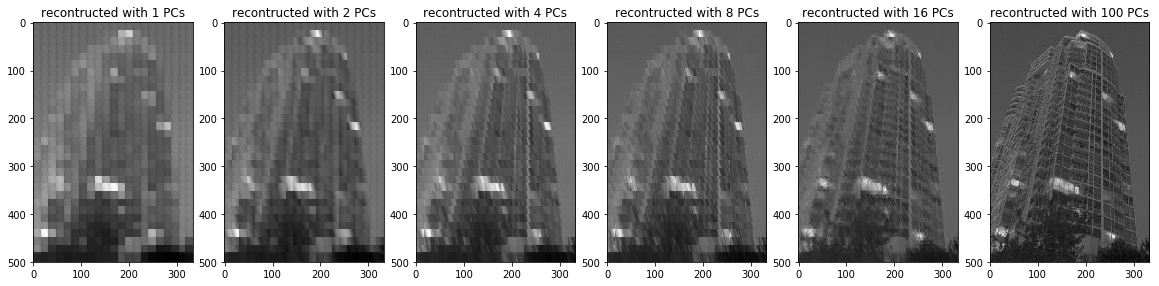

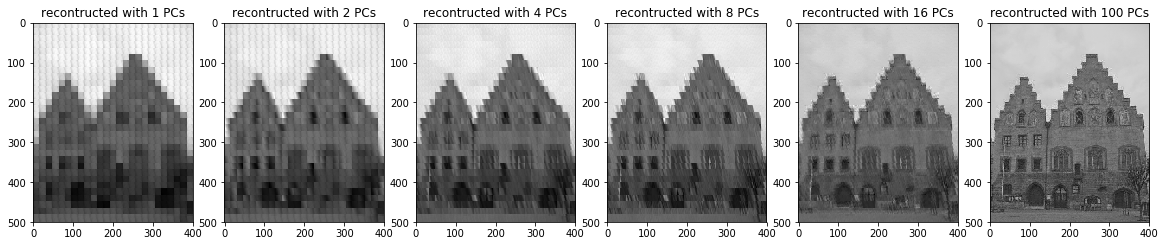

Reconstructed nature images


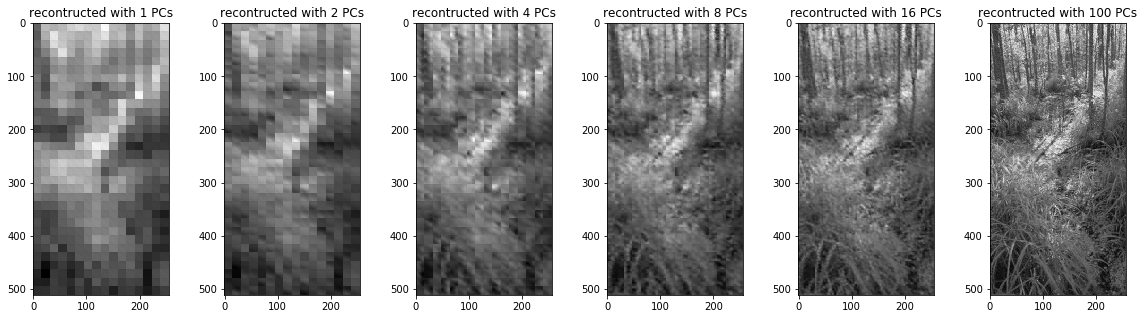

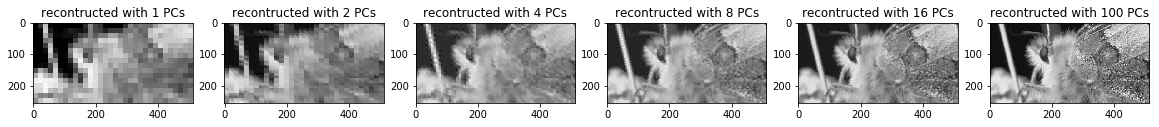

In [14]:
print ('Reconstructed building images')
recontruct_image(os.path.join(path, building[3]), 'building')
recontruct_image(os.path.join(path, building[6]), 'building')
print ('Reconstructed nature images')
recontruct_image(os.path.join(path, nature[3]), 'nature')
recontruct_image(os.path.join(path, nature[9]), 'nature')